In [12]:
%reload_ext autoreload
%autoreload 2

In [13]:
#import tkinter as tk
#from tkinter import ttk
import numpy as np 
#import matplotlib.pyplot as plt
import os
#from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
#from matplotlib.animation import FuncAnimation
#from matplotlib.colors import LinearSegmentedColormap
#from matplotlib.figure import Figure

In [14]:
# Get the current directory of the notebook
notebook_dir = os.getcwd()

# Construct the path to the project's root directory
project_root = os.path.abspath(os.path.join(notebook_dir, os.pardir))

# Add the project's root directory to the Python path
import sys
sys.path.append(project_root)

In [15]:
from src.percolation import FireSimulation
from src.visualization import visualize_fire_sequence

In [16]:
# Parameter

N = 10 # NxN is the dimension of the matrix
p = 0.5 # The density of the trees

In [17]:
simulation = FireSimulation(N=10, p=0.5)
configs = simulation.simulate_fire_spread(10)

invalid command name "140152844284864animate"
    while executing
"140152844284864animate"
    ("after" script)


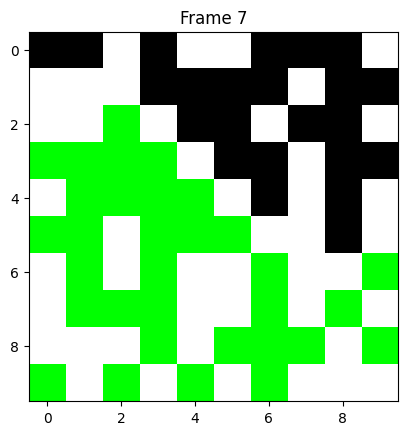

In [21]:
visualize_fire_sequence(configs)